#  <center>Module 9 Notebook
## <center>Tree-Based Methods

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,export_graphviz, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn import tree
import seaborn as sns

In [83]:
hitters= pd.read_csv('Hitters.csv', index_col= 0).dropna()
hitters

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,,,,,,,,,,,,,,,,,,,
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A


#### Create regression tree

In [84]:
X= hitters[['Years', 'Hits']]
y=hitters['Salary']

In [85]:
X

,Years,Hits
AtBat,,
315,14,81
479,3,130
496,11,141
321,2,87
594,11,169
...,...,...
497,5,127
492,12,136
475,6,126


<AxesSubplot:xlabel='Salary', ylabel='Count'>

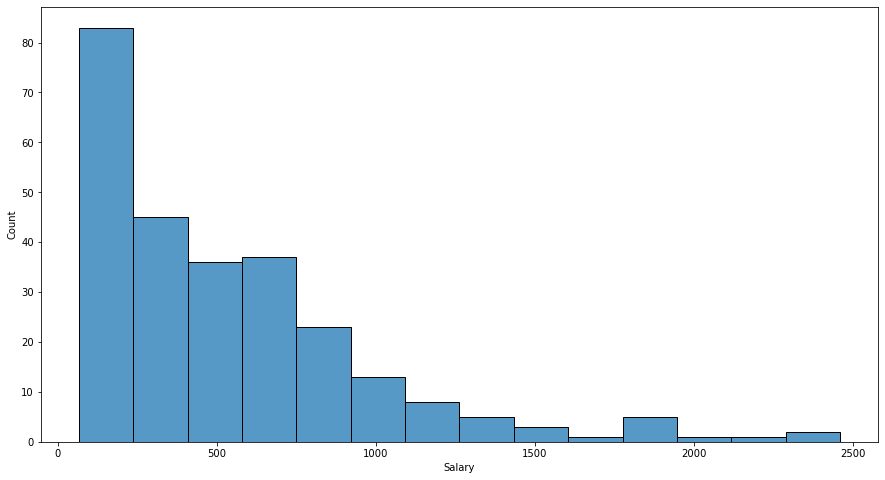

In [86]:
sns.histplot(hitters['Salary'])

In [87]:
hitters_regressor = DecisionTreeRegressor(random_state = 0, max_leaf_nodes=3)
hitters_regressor.fit(X, y)
print(tree.export_text(hitters_regressor))

|--- feature_0 <= 4.50
|   |--- value: [225.83]
|--- feature_0 >  4.50
|   |--- feature_1 <= 117.50
|   |   |--- value: [464.92]
|   |--- feature_1 >  117.50
|   |   |--- value: [949.17]



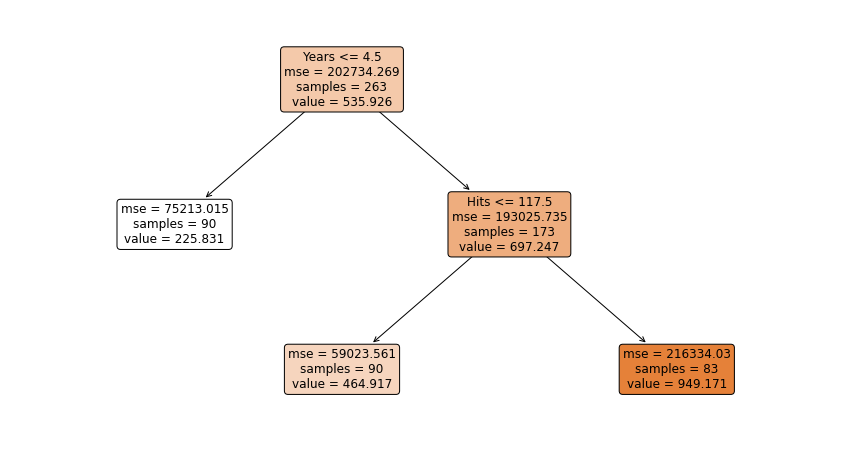

In [88]:
plt.rcParams['figure.figsize'] = [15,8]
tree.plot_tree(hitters_regressor, feature_names = X.columns, fontsize = 12, filled = True, rounded = True)
plt.show()

In [89]:
low_cutpoint, high_cutpoint = 500,1000
hitters['salary_range'] = pd.cut(hitters['Salary'], [0, low_cutpoint, high_cutpoint, np.inf], labels = ["low", "medium", "high"])
hitters

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,salary_range
AtBat,,,,,,,,,,,,,,,,,,,,
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N,low
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A,low
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N,low
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N,low
594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N,medium
492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A,medium
475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A,low


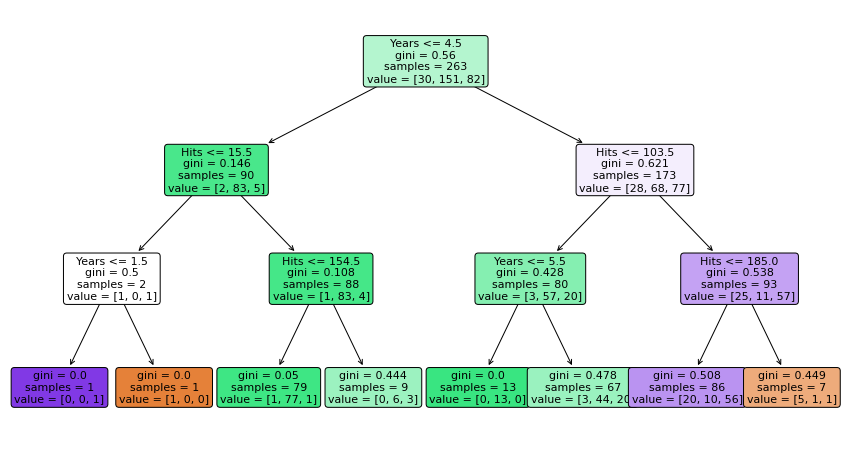

In [90]:
y_class = hitters['salary_range']
hitters_classifier = DecisionTreeClassifier(random_state = 0, max_depth = 3)
hitters_classifier.fit(X, y_class)
plt.rcParams['figure.figsize'] = [15,8]
tree.plot_tree(hitters_classifier, feature_names = X.columns, fontsize = 11, filled = True, rounded = True)
plt.show()

Text(0.5, 1.0, 'The three-region partition for the Hitters Data')

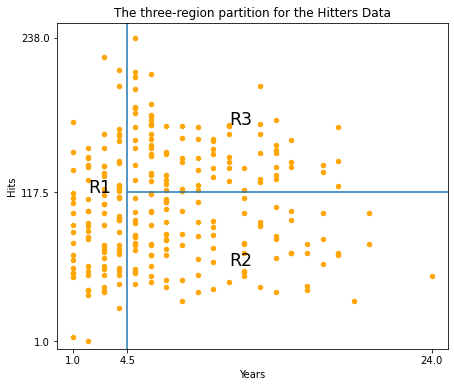

In [91]:
hitters.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large')
plt.title('The three-region partition for the Hitters Data')

### Fitting Classification Trees -  Carseats Example

In [92]:
carseats = pd.read_csv('Carseats.csv').dropna()
carseats['high']= pd.Series(np.where(carseats.Sales<=8, 0, 1))  # Define category response - high sales
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [93]:
carseats['US'] = pd.get_dummies(carseats['US'])['Yes']
carseats['Urban'] = pd.get_dummies(carseats['Urban'])['Yes']
carseats.loc[carseats['ShelveLoc'] == 'Bad','ShelveLoc'] = 0
carseats.loc[carseats['ShelveLoc'] == 'Medium', 'ShelveLoc'] = 1
carseats.loc[carseats['ShelveLoc'] == 'Good', 'ShelveLoc'] = 2
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1,0
397,7.41,162,26,12,368,159,1,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [94]:
X= carseats.drop(['high','Sales'],axis=1)
y= carseats['high']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.5, random_state=0)

Built classification tree with no limit on tree depth and no cost complexity pruning (alpha = 0)

In [95]:
carseats_classifier= DecisionTreeClassifier()
carseats_classifier.fit(X_train,y_train)
print(tree.export_text(carseats_classifier, feature_names = list(X.columns)))

|--- Price <= 94.50
|   |--- Age <= 55.50
|   |   |--- ShelveLoc <= 0.50
|   |   |   |--- Advertising <= 2.50
|   |   |   |   |--- Price <= 89.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Price >  89.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Advertising >  2.50
|   |   |   |   |--- class: 1
|   |   |--- ShelveLoc >  0.50
|   |   |   |--- class: 1
|   |--- Age >  55.50
|   |   |--- Price <= 80.00
|   |   |   |--- class: 1
|   |   |--- Price >  80.00
|   |   |   |--- CompPrice <= 112.00
|   |   |   |   |--- class: 0
|   |   |   |--- CompPrice >  112.00
|   |   |   |   |--- Education <= 17.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Education >  17.50
|   |   |   |   |   |--- class: 0
|--- Price >  94.50
|   |--- Advertising <= 13.50
|   |   |--- CompPrice <= 126.50
|   |   |   |--- Income <= 101.00
|   |   |   |   |--- Education <= 15.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Education >  15.50
|   |   |   |   |   |--- ShelveLoc <= 1

Check confusion matrix and misclassificaiton rate

In [96]:
#  Check training partition
pred= carseats_classifier.predict(X_train)
cm = pd.DataFrame(confusion_matrix(y_train, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,118,0
Yes,0,82


In [97]:
#  Check test partition
pred= carseats_classifier.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,99,34
Yes,19,48


In [98]:
misclass_rate = (cm["No"]['Yes'] + cm['Yes']['No'])/sum(cm['No'] + cm['Yes'])
print('Misclassification rate:', misclass_rate)

Misclassification rate: 0.265


Try limiting max_depth to be 2

In [99]:
carseats_classifier= DecisionTreeClassifier(max_depth=2)
carseats_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

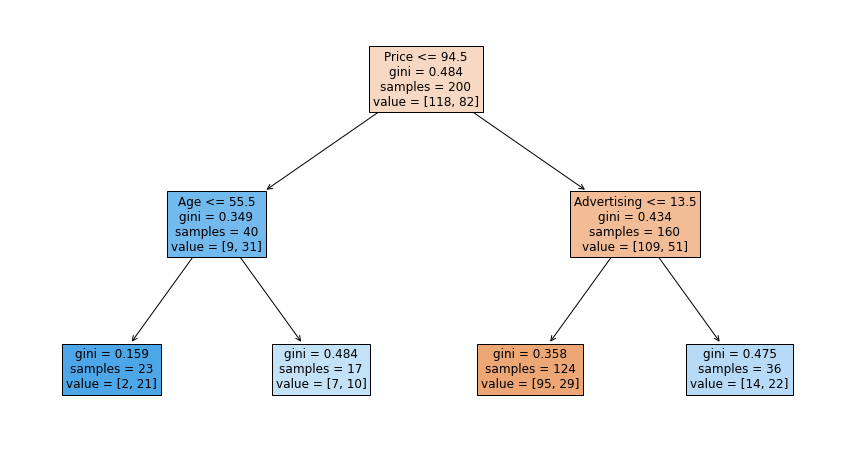

In [100]:
tree.plot_tree(carseats_classifier, feature_names = X.columns, fontsize = 12, filled = True)
plt.show()

In [101]:
pd.DataFrame(carseats_classifier.feature_importances_, index = X_train.columns)

,0
CompPrice,0.000000
Income,0.000000
Advertising,0.340432
Population,0.000000
Price,0.571145
ShelveLoc,0.000000
Age,0.088422
Education,0.000000
Urban,0.000000
US,0.000000


In [102]:
pred= carseats_classifier.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,102,46
Yes,16,36


In [103]:
misclass_rate = (cm["No"]['Yes'] + cm['Yes']['No'])/sum(cm['No'] + cm['Yes'])
print('Misclassification rate:', misclass_rate)

Misclassification rate: 0.31


### Perform cost complexity pruning

#### Calculate and Plot Alphas and Corresponding Impurities

In [104]:
carseats_classifier_cv = DecisionTreeClassifier(random_state=0)
path = carseats_classifier_cv.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Calculate and Plot Alphas and Corresponding Impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

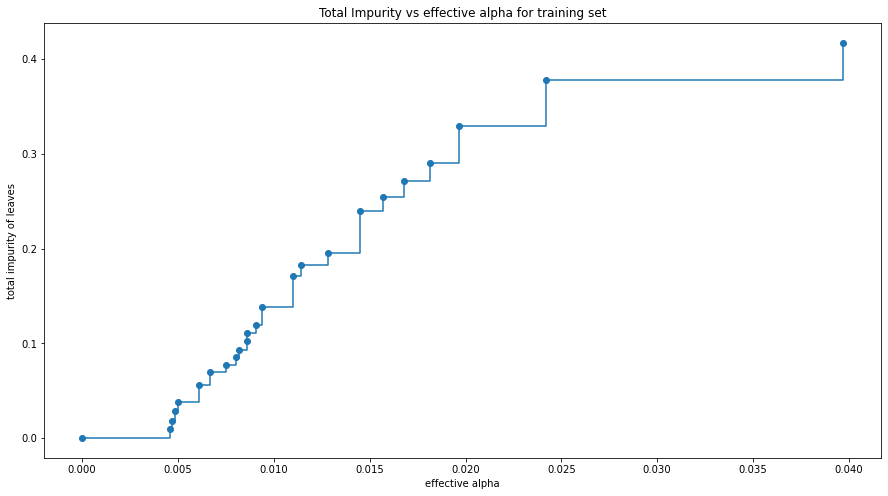

In [105]:
fig, ax = plt.subplots()
# Remove the last (highesst impurity) effective alpha because it corresponds to the case of a single node
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [106]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004583333333333333, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004666666666666668, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004838709677419352, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004991134751773053, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0060869565217391295, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006666666666666666, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0075, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007999999999999998, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008166666666666666, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008571428571428574, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008571428571428574, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009072580645161296, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009360717100078804, random_state=0),
 DecisionTreeClassifier

Remove the last node becuase it is the trivial single-node case

In [107]:
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06661249999999985


In [108]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

Plot the number of nodes vs alpha

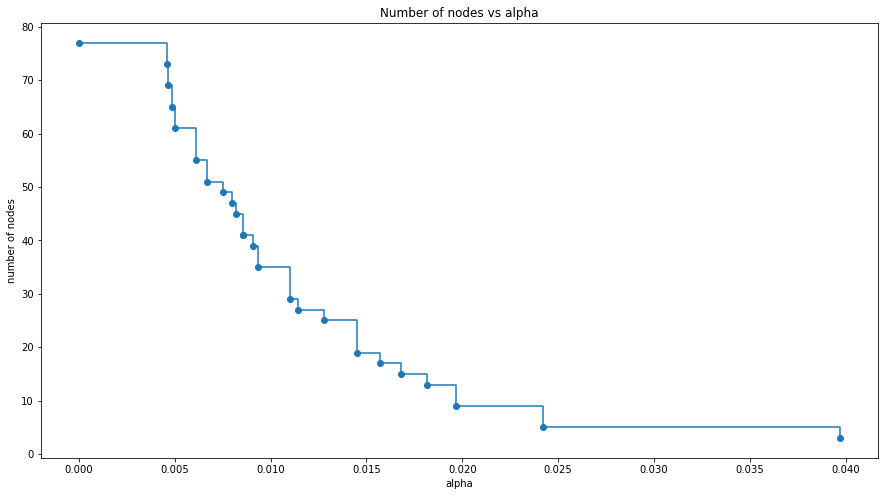

In [109]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("number of nodes")
plt.title("Number of nodes vs alpha")
plt.show()

Plot tree depth vs alpha

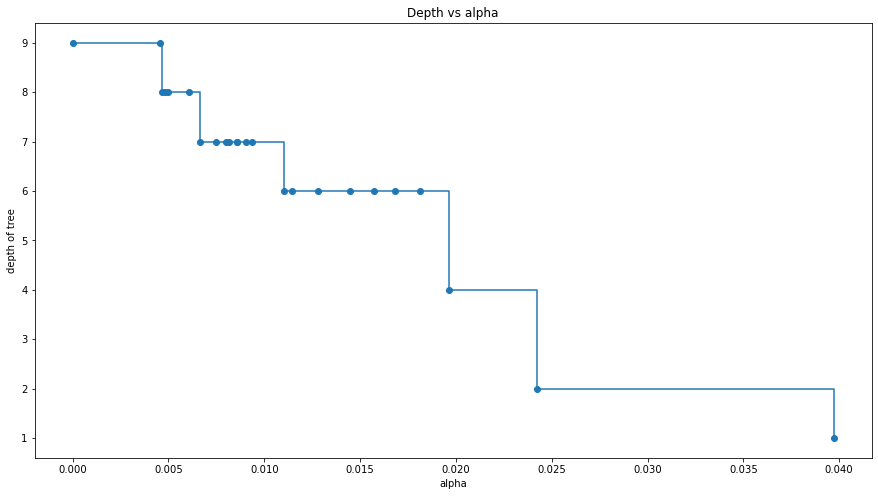

In [110]:
plt.plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("depth of tree")
plt.title("Depth vs alpha")
plt.show()

Plot accuracy vs alpha for training and test partitions

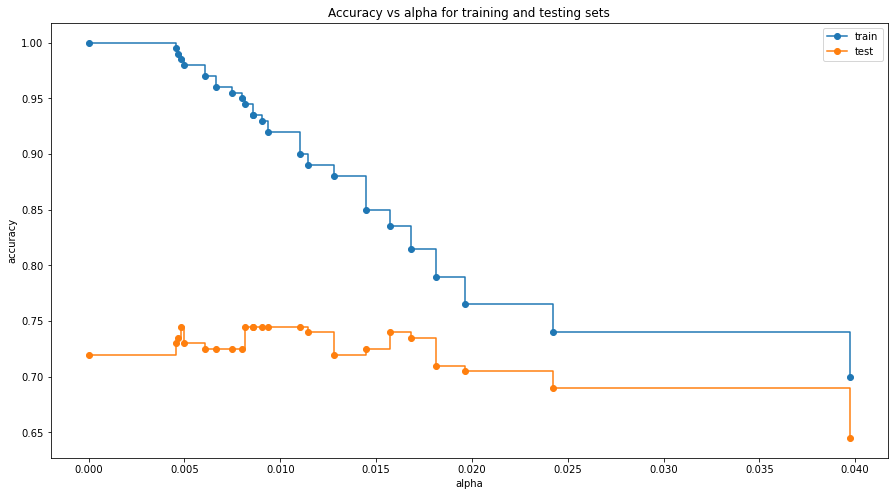

In [111]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Try re-running with a ccp_alpha = 0.01

In [112]:
carseats_classifier= DecisionTreeClassifier(ccp_alpha = 0.01)
carseats_classifier.fit(X_train,y_train)
pred= carseats_classifier.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,98,31
Yes,20,51


In [113]:
misclass_rate = (cm["No"]['Yes'] + cm['Yes']['No'])/sum(cm['No'] + cm['Yes'])
print('Misclassification rate:', misclass_rate)

Misclassification rate: 0.255


## Fitting Regression Trees - Boston Housing Dataset

In [114]:
boston= pd.read_csv('Boston.csv', index_col=0)
boston.reset_index(drop=True, inplace=True)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Fit regression tree with max_depth = 3

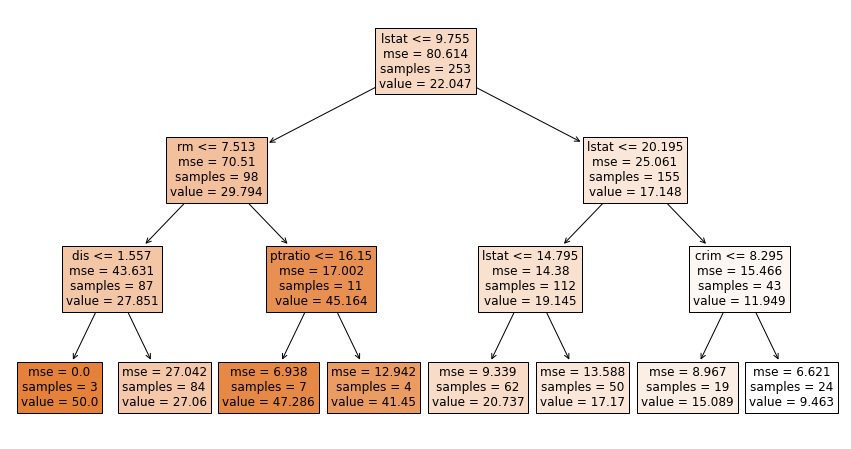

In [115]:
y= boston['medv']
x=  boston.drop('medv', axis=1)
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.5, random_state =1)
boston_regressor = DecisionTreeRegressor(max_depth = 3)
boston_model= boston_regressor.fit(x_train, y_train)
tree.plot_tree(boston_regressor, feature_names = x_train.columns, fontsize = 12, filled = True)
plt.show()

Calculate MSE using test partition

In [116]:
boston_pred= boston_model.predict(x_test)
boston_mse= mean_squared_error(boston_pred, y_test)
boston_mse

24.078745008158172

## Ensemble Models

### Bagging

In [133]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
bagging= RandomForestRegressor(max_features=12, random_state=2)  # by using all features, we implement bagging
bagging.fit(x_train, y_train)
bagging_pred= bagging.predict(x_test)
bagging_mse= mean_squared_error(bagging_pred, y_test)
bagging_mse

11.56611499209486

### Random Forest

In [138]:
forest= RandomForestRegressor(max_features=6, random_state=2)  # Select only 6 features at each decision point
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
forest_mse = mean_squared_error(forest_pred, y_test)
forest_mse

11.210173703557313

## Variable Importance

<AxesSubplot:>

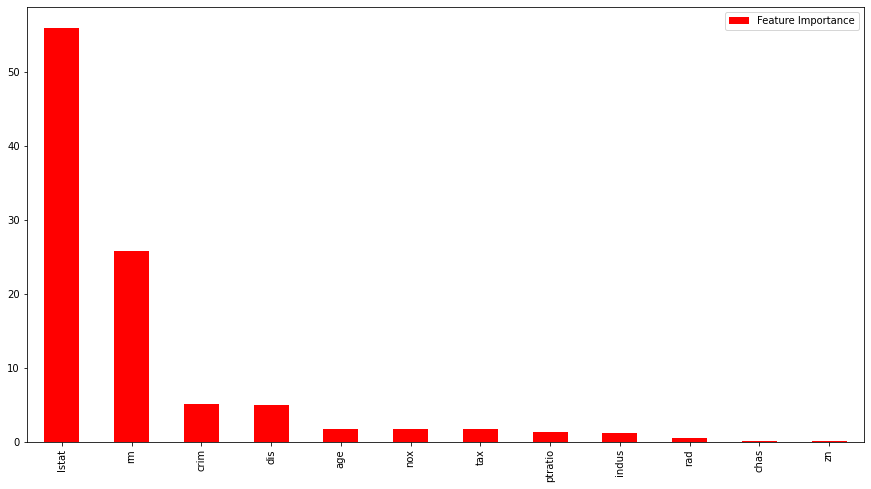

In [139]:
bagging_featureImportance = pd.DataFrame({'Feature Importance':bagging.feature_importances_*100},index =x.columns)
bagging_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

<AxesSubplot:>

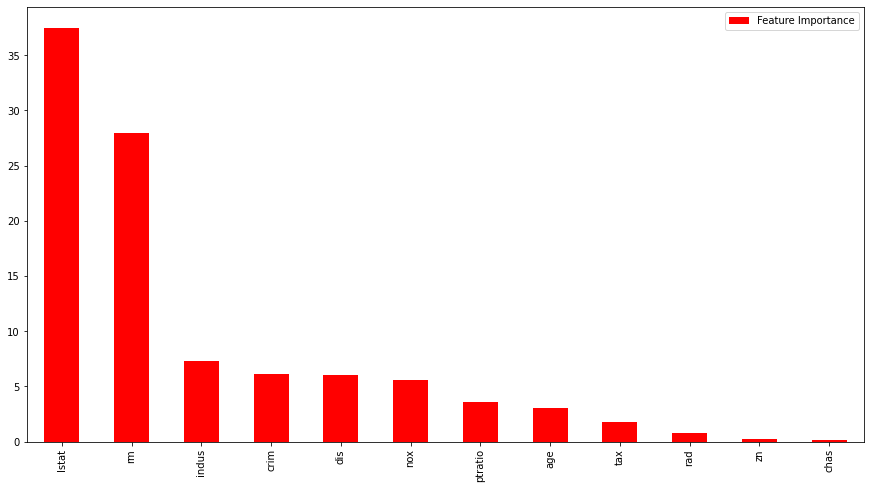

In [141]:
rf_featureImportance= pd.DataFrame({'Feature Importance':forest.feature_importances_*100}, index= x.columns)
rf_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

## AdaBoost

In [143]:
from sklearn.ensemble import AdaBoostRegressor
abr= AdaBoostRegressor(n_estimators=5000, random_state=1)
abr.fit(x_train, y_train)
abr_pred = abr.predict(x_test)
abr_mse= mean_squared_error(abr_pred, y_test)
abr_mse

15.134274042481255

## Gradient Boosting

In [142]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(n_estimators=5000, random_state=1)
gbr.fit(x_train, y_train)
gbr_pred= gbr.predict(x_test)
gbr_mse= mean_squared_error(gbr_pred, y_test)
gbr_mse

11.257353976484772

<AxesSubplot:>

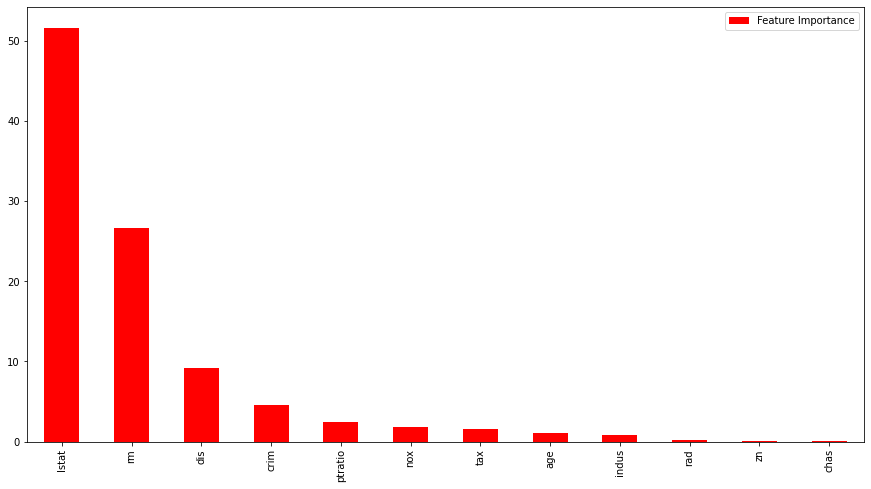

In [144]:
gb_featureImportance= pd.DataFrame({'Feature Importance':gbr.feature_importances_*100}, index= x.columns)
gb_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')